<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Hydrogen_Plasmolysis_Eng2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-17-b66c3bed69ae>:56: RuntimeWarning: invalid value encountered in sqrt
  w_p = np.sqrt(n_plasma * e**2 / (eps_0 * m_h))
<ipython-input-17-b66c3bed69ae>:60: RuntimeWarning: invalid value encountered in sqrt
  lambda_D = np.sqrt(eps_0 * k_b * T / (n_plasma * e**2))
<ipython-input-17-b66c3bed69ae>:70: RuntimeWarning: overflow encountered in double_scalars
  F_e = D_e * n_e * e * V[i] + k_recomb * n_h * n_e
<ipython-input-17-b66c3bed69ae>:70: RuntimeWarning: invalid value encountered in double_scalars
  F_e = D_e * n_e * e * V[i] + k_recomb * n_h * n_e


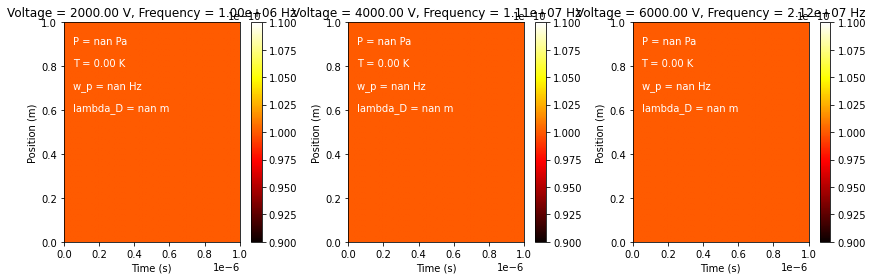

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#Define constants
k_b = 1.38e-23 # Boltzmann constant
e = 1.6e-19 # Electron charge
eps_0 = 8.85e-12 # Permittivity of vacuum
m_h = 1.67e-27 # Mass of hydrogen atom
m_o = 2.0*m_h # Mass of oxygen atom
L = 1
V0 = 2000 #


#Define initial conditions
n_h = 1.0e10 # Number density of hydrogen atoms (m^-3)
n_o = 1.0e10 # Number density of oxygen atoms (m^-3)
n_e = n_h # Number density of electrons (m^-3)
T = 300 # Temperature (K)

#Define simulation parameters
dt = 1e-9 # Time step (s)
t_end = 1e-6 # End time (s)
t = np.arange(0, t_end, dt)

#Define electric field
f = np.linspace(1e6, 1e9, 100) # Frequency (Hz)
V = V0*np.linspace(1, 100, 100) # Voltage (V)
w = 0.5e-3 # Water flow rate (m^3/s)

#Initialize arrays
n_h_arr = np.zeros((len(V), len(f)))
n_o_arr = np.zeros((len(V), len(f)))
n_e_arr = np.zeros((len(V), len(f)))
P_arr = np.zeros((len(V), len(f)))
T_arr = np.zeros((len(V), len(f)))

#Run simulations for different frequencies and voltages
for i in range(len(V)):
  for j in range(len(f)):
# Calculate collision rates
    k_ei = 3.6e-19 * n_h * np.sqrt(T) # Electron-ion collision rate
    k_ee = 1.8e-19 * n_e * np.sqrt(T) # Electron-electron collision rate
    k_recomb = 1e-21 * n_h * n_e # Recombination rate 1e-11

# Calculate diffusion coefficients
    D_h = k_b * T / (np.sqrt(2) * np.pi * m_h * k_ei)
    D_o = k_b * T / (np.sqrt(2) * np.pi * m_o * k_ei)
    D_e = k_b * T / (np.sqrt(2) * np.pi * m_h * k_ee)

# Calculate drift velocities
    v_h = e * V[i] / (m_h * k_ei)
    v_o = e * V[i] / (m_o * k_ei)

# Calculate plasma frequency
    n_plasma = n_h + n_e + 1e-15
    w_p = np.sqrt(n_plasma * e**2 / (eps_0 * m_h))
#    print(n_plasma)

# Calculate Debye length
    lambda_D = np.sqrt(eps_0 * k_b * T / (n_plasma * e**2))
#    print(lambda_D)

# Calculate gas pressure and temperature inside plasma ball
    P_gas = n_plasma * k_b * T
    T_gas = m_h * v_h**2 / (3 * k_b)

# Calculate fluxes
    F_h = -D_h * n_h * v_h + e * n_h * V[i]
    F_o = -D_o * n_o * v_o
    F_e = D_e * n_e * e * V[i] + k_recomb * n_h * n_e

# Update number densities
    n_h += F_h * dt + w * n_h
    n_o += F_o * dt + w * n_o
    n_e += F_e * dt + w * n_e

# Store results
    n_h_arr[i, j] = n_h
    n_e_arr[i,j]  = n_e
    n_h_arr = np.maximum(n_h_arr, 1e-10)
    n_e_arr = np.maximum(n_e_arr, 1e-10)

# Plot results
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in enumerate(axs):
    im = ax.imshow(n_h_arr.T, cmap='hot', extent=(0, t_end, 0, L), aspect='auto', origin='lower')
    ax.set_title('Voltage = {:.2f} V, Frequency = {:.2e} Hz'.format(V[i], f[i]))
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Position (m)')
    ax.text(0.05, 0.9, 'P = {:.2e} Pa'.format(P_gas), transform=ax.transAxes, color='white')
    ax.text(0.05, 0.8, 'T = {:.2f} K'.format(T_gas), transform=ax.transAxes, color='white')
    ax.text(0.05, 0.7, 'w_p = {:.2e} Hz'.format(w_p), transform=ax.transAxes, color='white')
    ax.text(0.05, 0.6, 'lambda_D = {:.2e} m'.format(lambda_D), transform=ax.transAxes, color='white')
    fig.colorbar(im, ax=ax)

fig.tight_layout()
plt.show()

